In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from keras.regularizers import l1, l2
import warnings
warnings.filterwarnings("ignore")

In [ ]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [ ]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), #S1
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), #S1
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.BatchNormalization(),
    #keras.layers.MaxPooling2D(pool_size=(2, 2)), #S1
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(256, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.BatchNormalization(),
    #keras.layers.MaxPooling2D(pool_size=(2, 2)), #S1
    keras.layers.Dropout(0.25),
   

    keras.layers.Flatten(), #Flatten   
    keras.layers.Dense(512, activation='relu'), #F1
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax') #Output layer
])


In [ ]:
lenet.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_259 (Conv2D)         (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization_159 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_260 (Conv2D)         (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization_160 (Ba  (None, 28, 28, 32)       128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                     

In [ ]:
lenet.compile(optimizer='Adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
hist = lenet.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test),verbose=1)

Epoch 1/50
1563/1563 [==============================] - 23s 11ms/step - loss: 1.6630 - accuracy: 0.4240 - val_loss: 1.6466 - val_accuracy: 0.4100
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1128 - accuracy: 0.6147 - val_loss: 0.9821 - val_accuracy: 0.6546
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9147 - accuracy: 0.6889 - val_loss: 0.7799 - val_accuracy: 0.7299
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7959 - accuracy: 0.7287 - val_loss: 0.7740 - val_accuracy: 0.7382
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7140 - accuracy: 0.7573 - val_loss: 0.8468 - val_accuracy: 0.7193
Epoch 6/50
1563/1563 [==============================] - 16s 11ms/step - loss: 0.6425 - accuracy: 0.7842 - val_loss: 0.6787 - val_accuracy: 0.7698
Epoch 7/50
1563/1563 [==============================] - 16s 11ms/step - loss: 0.5864 - accuracy: 0.8021 - val_loss: 0.6152 -

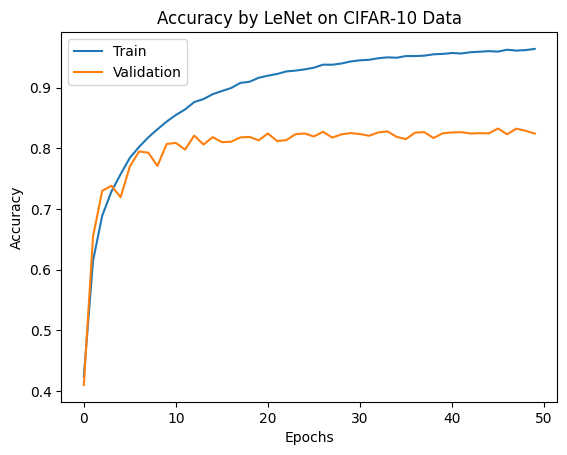

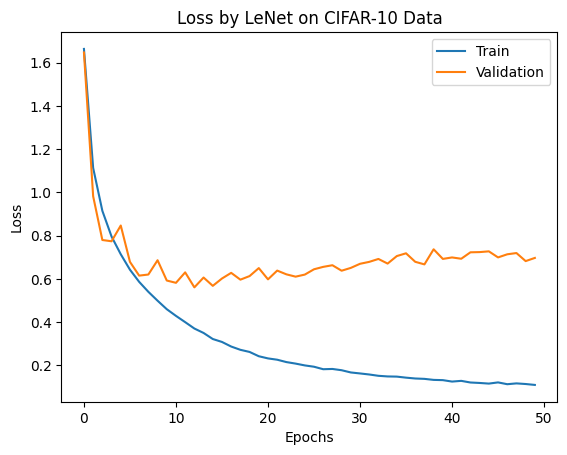

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 1s 3ms/step


array([[815,  15,  34,   9,  24,   4,   9,  12,  42,  36],
       [  7, 913,   1,   2,   2,   0,  10,   1,  12,  52],
       [ 37,   4, 737,  55,  49,  36,  49,  21,   8,   4],
       [  9,   2,  50, 649,  58, 121,  54,  24,  12,  21],
       [  5,   2,  52,  38, 827,  15,  28,  27,   6,   0],
       [  4,   4,  47, 115,  34, 714,  26,  43,   2,  11],
       [  3,   6,  14,  29,  16,   6, 917,   6,   1,   2],
       [  5,   1,  12,  18,  44,  23,   5, 885,   2,   5],
       [ 29,  23,  10,   6,   6,   2,   7,   2, 887,  28],
       [ 12,  58,   4,   4,   3,   2,   5,   6,   8, 898]])

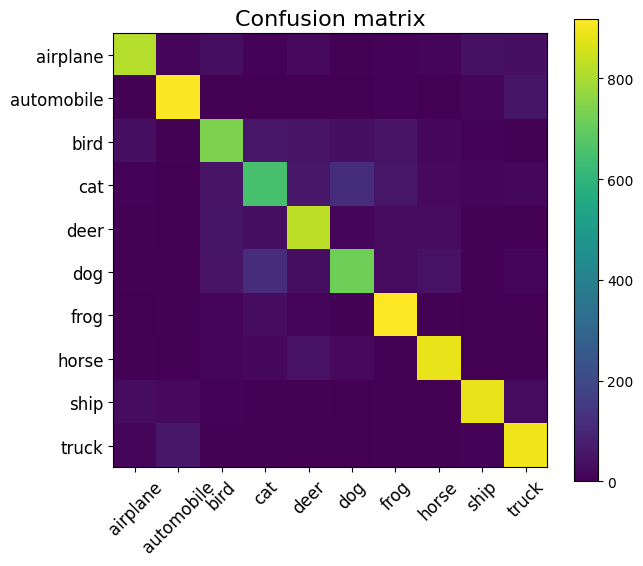

In [ ]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [ ]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.8242


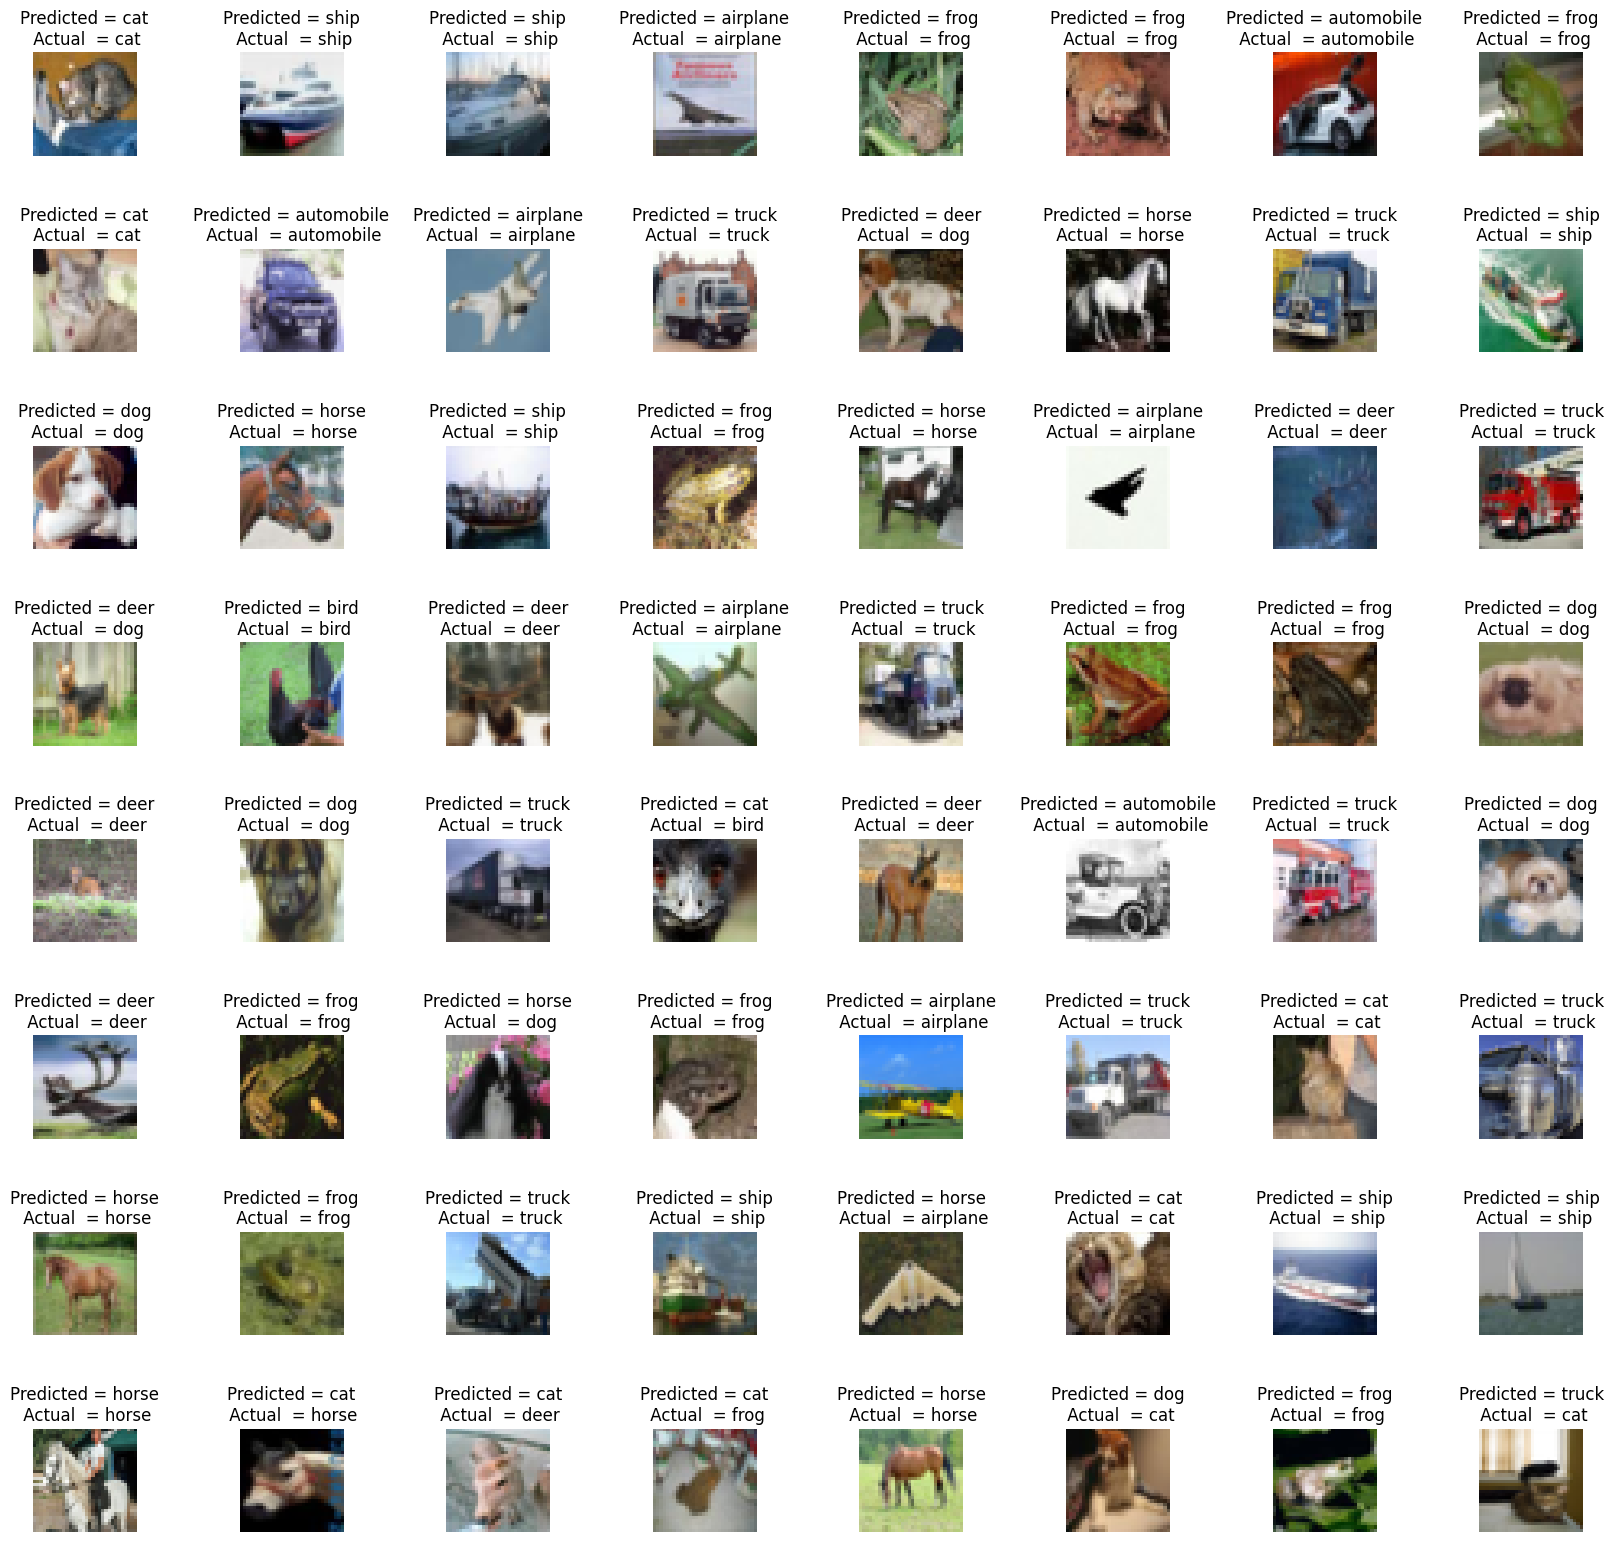

In [ ]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)